## Stewart Merritt
# 12/3/2024
# Question: How do businesses in randolf perform on a sentiment analysis and what are the most common words?

In [21]:
import requests
import yelpkeys
import time
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')

API_KEY = yelpkeys.api_key
API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'
BUSINESS_PATH = '/v3/businesses/'  # Business ID will come after this path.
HEADERS = {'Authorization': f'Bearer {API_KEY}'}


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\stewa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\stewa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


making the request to the yelp thing (ChatGPT)

In [22]:
def request(host, path, api_key, url_params=None):
    url_params = url_params or {}
    url = f"{host}{path}"
    try:
        response = requests.get(url, headers={'Authorization': f'Bearer {api_key}'}, params=url_params)
        response.raise_for_status()
    except HTTPError as e:
        if response.status_code == 429:
            print("Rate limit exceeded. Waiting for 60 seconds...")
            time.sleep(60)  # Wait for a minute before retrying
            return request(host, path, api_key, url_params)
        else:
            raise e
    return response.json()

def search(api_key, term, location, limit=20):
    url_params = {'term': term, 'location': location, 'limit': limit}
    return request(API_HOST, SEARCH_PATH, api_key, url_params)

def get_reviews(api_key, business_id):
    path = f"{BUSINESS_PATH}{business_id}/reviews"
    return request(API_HOST, path, api_key)

In [23]:
response = search(API_KEY, term="business", location="Randolf, NJ", limit=20)
businesses = response.get("businesses", [])

reviews_list = []
business_names = []

for business in businesses:
    business_id = business['id']
    business_names.append(business['name'])
    reviews = get_reviews(API_KEY, business_id)
    for review in reviews.get('reviews', []):
        reviews_list.append(review['text'])

print(f"Collected {len(reviews_list)} reviews from {len(business_names)} businesses.")

NameError: name 'HTTPError' is not defined

Identifying the reviews from the businesses (ChatGPT)

In [ ]:
import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_review(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    words = text.lower().split()  # Simple tokenization using split() for words
    return ' '.join([word for word in words if word not in stop_words])

reviews_list = ["This is a great place!", "The food was awful.", "Absolutely amazing service."]
cleaned_reviews = [clean_review(review) for review in reviews_list]

print(cleaned_reviews)


['great place', 'food awful', 'absolutely amazing service']


In [ ]:
from textblob import TextBlob

sentiment_results = {'Positive': 0, 'Negative': 0, 'Neutral': 0}

cleaned_reviews = ["This is a great place!", "The food was awful.", "Absolutely amazing service."]

for review in cleaned_reviews:
    blob = TextBlob(review)
    
    polarity = blob.sentiment.polarity
    if polarity > 0:
        sentiment_results['Positive'] += 1
    elif polarity < 0:
        sentiment_results['Negative'] += 1
    else:
        sentiment_results['Neutral'] += 1

print("Sentiment Analysis Results:", sentiment_results)


Sentiment Analysis Results: {'Positive': 2, 'Negative': 1, 'Neutral': 0}


Making the table (ChatGPT)

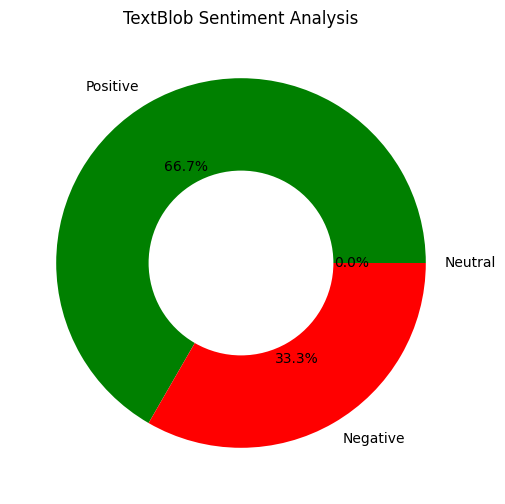

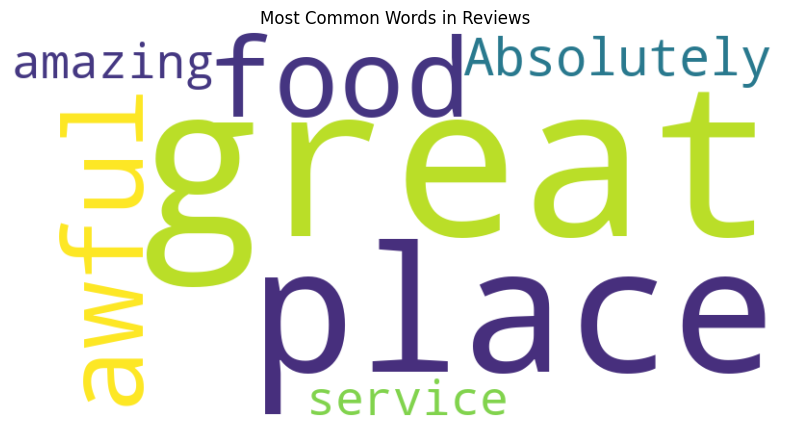

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Donut Chart for TextBlob Sentiment
labels = ['Positive', 'Negative', 'Neutral']
values = [sentiment_results[label] for label in labels]  # Fix: direct access to sentiment_results

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(values, labels=labels, wedgeprops=dict(width=0.5), colors=['green', 'red', 'blue'], autopct='%1.1f%%')
ax.set_title('TextBlob Sentiment Analysis')
plt.show()

# WordCloud
all_words = ' '.join(cleaned_reviews)
wordcloud = WordCloud(width=800, height=400, max_words=20, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Reviews')
plt.show()